In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-of-tweet-reviews/train.csv
/kaggle/input/sentiment-analysis-of-tweet-reviews/test.csv


# **LIBRARIES**

In [2]:
import re
import emoji 

import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import string
import nltk
from nltk import PorterStemmer
from nltk.corpus import stopwords

import urllib
import requests
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud,ImageColorGenerator, STOPWORDS

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)
#plt.style.use("plotly_dark")

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

# **READING DATASET**

In [3]:
tr_ds = "/kaggle/input/sentiment-analysis-of-tweet-reviews/train.csv"
tr_ds = pd.read_csv(tr_ds)
tr_org_copy = tr_ds.copy()

ts_ds = "/kaggle/input/sentiment-analysis-of-tweet-reviews/test.csv"
ts_ds = pd.read_csv(ts_ds)
ts_org_copy = ts_ds.copy()

In [4]:
tr_ds.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [5]:
ts_ds.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [6]:
tr_ds.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
ts_ds.isnull().sum()

id       0
tweet    0
dtype: int64

In [8]:
combine_ds = pd.concat([tr_org_copy, tr_org_copy], ignore_index=True, sort=True)

In [9]:
combine_ds.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [10]:
combine_ds.tail(10)

,id,label,tweet
63914,31953,0,@user you went too far with @user
63915,31954,0,good morning #instagram #shower #water #berlin...
63916,31955,0,#holiday bull up: you will dominate your bul...
63917,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...
63918,31957,0,off fishing tomorrow @user carnt wait first ti...
63919,31958,0,ate @user isz that youuu?ðððððð...
63920,31959,0,to see nina turner on the airwaves trying to...
63921,31960,0,listening to sad songs on a monday morning otw...
63922,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
63923,31962,0,thank you @user for you follow


# **DATA PREPROCESSING:**
1. EDA 
2. Feature Enginnering
* Removing Twitter usernames
* Removing punctuation, numbers, & special characters
* Removing short words (stopwords)
* Tokenization
* Stemming
3. Feature Selection

In [11]:
def pattern_remove(text,pattern):
    
    #finds pattern i.e @user --> list 
    r = re.findall(pattern,text)
    
    #removes @user 
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [12]:
combine_ds['cleaned_tweets'] = np.vectorize(pattern_remove)(combine_ds['tweet'], "@[\w]*")
combine_ds.head(10)

,id,label,tweet,cleaned_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [13]:
#removing punctuation, numbers, & special characters


combine_ds['cleaned_tweets'] = combine_ds['cleaned_tweets'].str.replace("[^a-zA-Z#]", " ")
combine_ds.head(10)

,id,label,tweet,cleaned_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [14]:
#removing shortwords


combine_ds['cleaned_tweets'] = combine_ds['cleaned_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combine_ds.head(10)

,id,label,tweet,cleaned_tweets
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fare talking before they leave. cha...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...,next school year year exams.ð¯ can't think a...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,won!!! love land!!! #allin #cavs #champions #c...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here it's #gr8


In [15]:
#tokenization


token_tweet = combine_ds['cleaned_tweets'].apply(lambda x: x.split())
token_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: cleaned_tweets, dtype: object

In [16]:
#stemming


stemming = PorterStemmer()
token_tweet = token_tweet.apply(lambda x: [stemming.stem(i) for i in x])
token_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: cleaned_tweets, dtype: object

In [17]:
for i in range(len(token_tweet)):
    token_tweet[i] = ' '.join(token_tweet[i])

combine_ds['cleaned_tweets'] = token_tweet
combine_ds.head()

,id,label,tweet,cleaned_tweets
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


In [18]:
positive_words = ' '.join(text for text in combine_ds['cleaned_tweets'][combine_ds['label']==1])

In [19]:
#fetching img from URL
response = requests.get('https://dwglogo.com/wp-content/uploads/2019/02/Twitter_logo.png')
image = Image.open(BytesIO(response.content))

#image --> RGB 
image = image.convert('RGB')

mask = np.array(image)

#using ImageColorGenerator insted of stopwords 
img_colours = ImageColorGenerator(mask)

#implementation
word_cloud = WordCloud(background_color='black', height=1500, width=4000, mask=mask).generate(positive_words)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


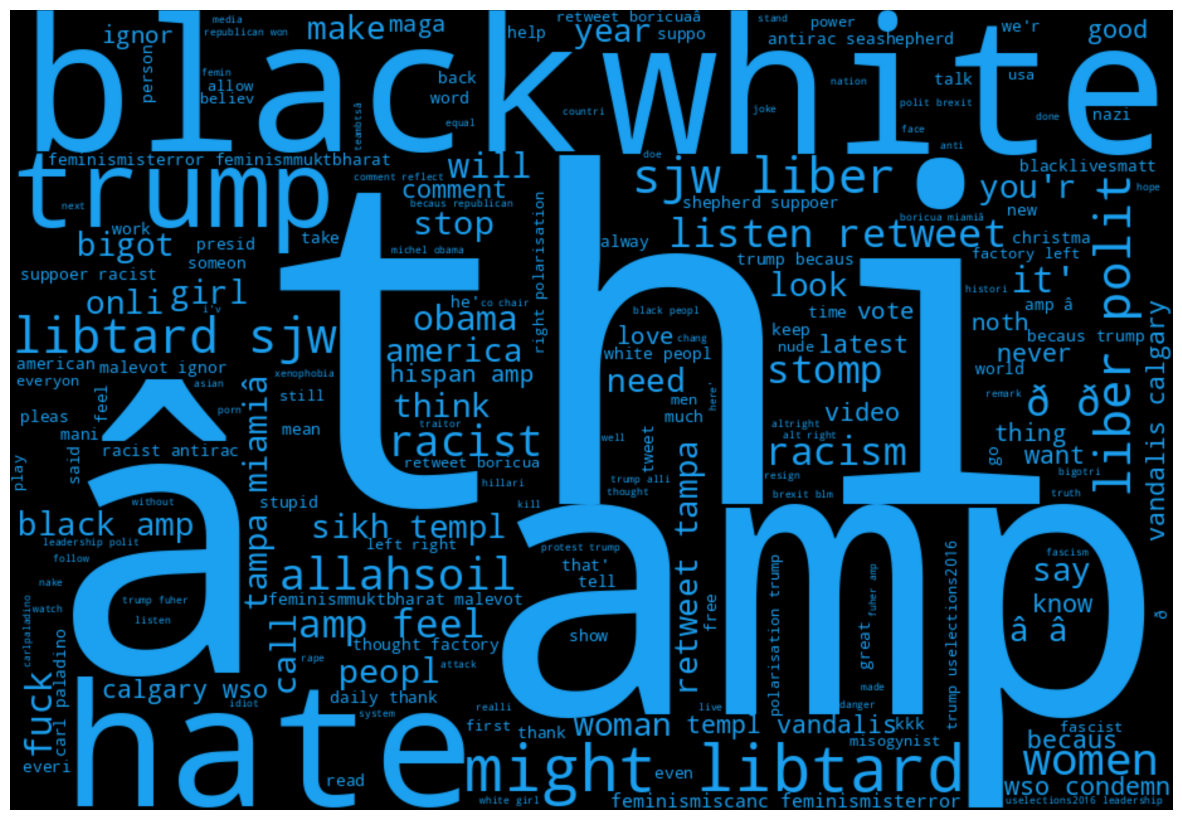

In [20]:
#size 

plt.figure(figsize=(15,15))
plt.imshow(word_cloud.recolor(color_func=img_colours),interpolation="gaussian")      #recolour
plt.axis('off')
plt.show()

In [21]:
def extract_hashtages(x):
    hashtags=[]
    
    #loop
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [22]:
#nesting the hastag list from positive reviews


hash_pos = extract_hashtages(combine_ds['cleaned_tweets'][combine_ds['label']==0])
hash_pos

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['80day', 'gettingf'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro2016'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica16'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift1989'],
 ['traveling

In [23]:
#unnest tge list

unnest_hash1 = sum(hash_pos,[])

In [24]:
#nesting the hastag list from negative reviewws


hash_neg = extract_hashtages(combine_ds['cleaned_tweets'][combine_ds['label']==1])
hash_neg

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'medâ'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golfâ'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 ['â'],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflictâ'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 ['2016'],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatred', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['p21', 'fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'officerâ'],
 [],
 ['black', 'retweet', 'tampa', 'miamiâ'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'r

In [25]:
#unnest the list

unnest_hash2 = sum(hash_neg,[])

In [26]:
#counting frequency for positive words  


pos_word_freq= nltk.FreqDist(unnest_hash1)
pos_word_freq

FreqDist({'love': 3152, 'posit': 1810, 'smile': 1272, 'healthi': 1116, 'thank': 1052, 'fun': 868, 'affirm': 844, 'life': 798, 'model': 748, 'summer': 724, ...})

In [27]:
#creating dataframe for frequent positive words 


pos_df = pd.DataFrame({'Hashtags':list(pos_word_freq.keys()),'Count':list(pos_word_freq.values())})
pos_df.head(10)

,Hashtags,Count
0,run,140
1,lyft,4
2,disapoint,2
3,getthank,4
4,model,748
5,motiv,390
6,allshowandnogo,2
7,school,54
8,exam,16
9,hate,52


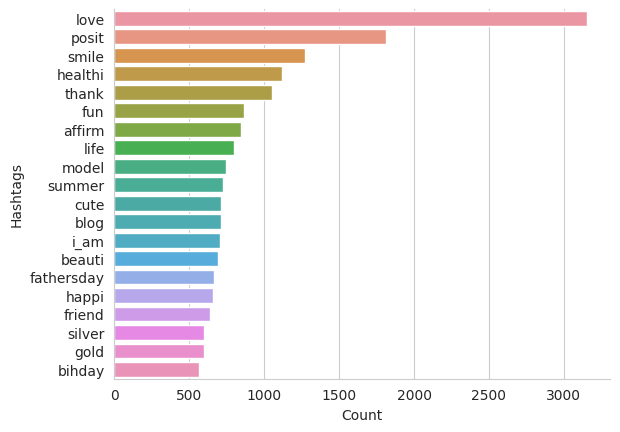

In [28]:
#top 20 most frequent positive words 


pos_df_plot = pos_df.nlargest(20,columns='Count')
sns.barplot(data=pos_df_plot,y='Hashtags',x='Count')
sns.despine()

In [29]:
#counting frequency for negative words  


neg_word_freq = nltk.FreqDist(unnest_hash2)
neg_word_freq

FreqDist({'trump': 266, 'polit': 188, 'allahsoil': 184, 'liber': 158, 'libtard': 154, 'sjw': 150, 'retweet': 114, 'black': 92, 'miamiâ': 76, 'hate': 72, ...})

In [30]:
#creating dataframe for frequent negative words 


neg_df = pd.DataFrame({'Hashtags':list(neg_word_freq.keys()),'Count':list(neg_word_freq.values())})
neg_df.head(10)

,Hashtags,Count
0,cnn,18
1,michigan,4
2,tcot,28
3,australia,12
4,opkillingbay,4
5,seashepherd,44
6,helpcovedolphin,6
7,thecov,8
8,neverump,12
9,xenophobia,24


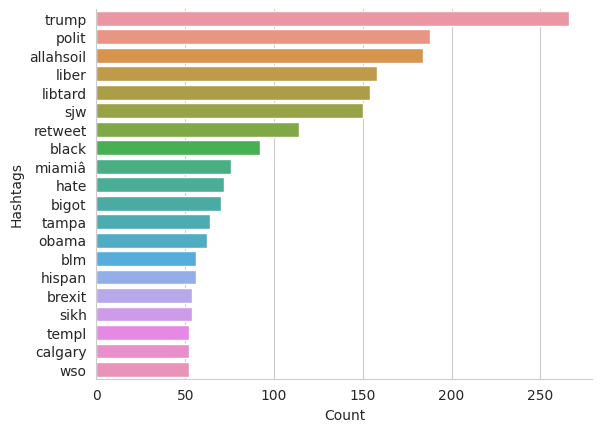

In [31]:
#top 20 most frequent negative words 


neg_df_plot = neg_df.nlargest(20,columns='Count')
sns.barplot(data=neg_df_plot,y='Hashtags',x='Count')
sns.despine()